# Experiment

In [1]:
import pandas as pd
data = pd.read_csv('RESULTS_MSDSGR22_exp3.csv')
# data = pd.concat([data1, data2])
# data.shape

In [2]:
data.describe()

,Prev.Length,Match.Score,Tile.Size,Browse.Time
count,990.000000,990.000000,9.900000e+02,990.000000
mean,75.000000,75.000000,2.000000e-01,10.458780
std,4.084546,3.163876,2.749191e-15,1.040230
min,70.000000,70.000000,2.000000e-01,7.206621
25%,70.000000,72.000000,2.000000e-01,9.738868
50%,75.000000,75.000000,2.000000e-01,10.446433
75%,80.000000,78.000000,2.000000e-01,11.191893
max,80.000000,80.000000,2.000000e-01,14.125249


## Renamed columns

In [3]:
data.rename(columns={'Browse.Time': 'browse_time', 'Tile.Size': 'tile_size', 'Match.Score': 'match_score', 'Prev.Length': 'prev_length', 'Prev.Type': 'prev_type'}, inplace=True)
data.head()

,prev_length,match_score,tile_size,prev_type,browse_time
0,75,79,0.2,TT,9.659422
1,75,79,0.2,TT,11.004677
2,75,79,0.2,TT,9.503274
3,75,79,0.2,TT,11.059120
4,75,79,0.2,TT,10.308966


## Changed categorical variables into 0 and 1 (Transform?)

In [4]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# data['prev_type'] = encoder.fit_transform(data['prev_type'])

# data.head()

## Single factor plots

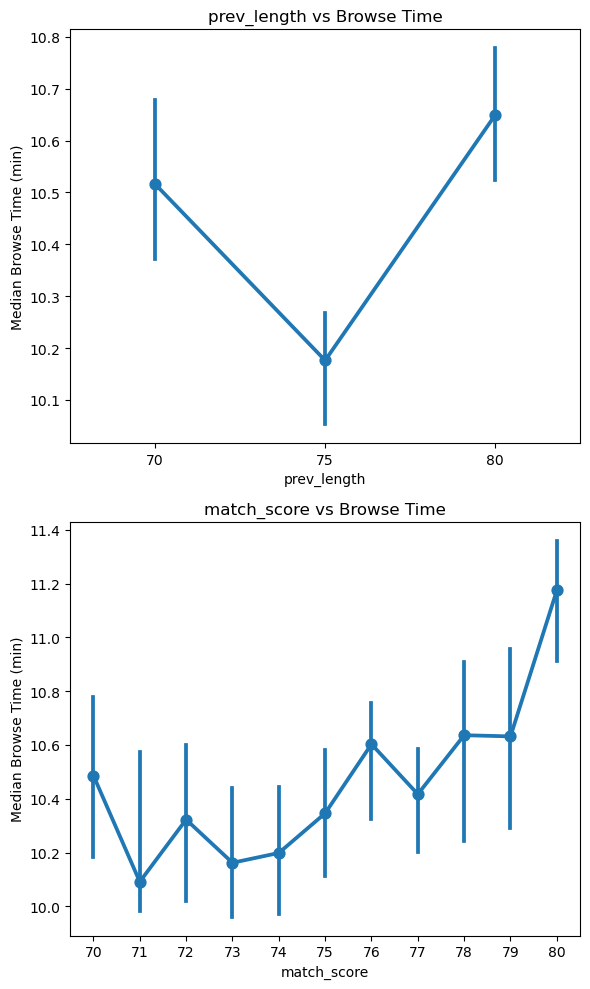

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

factors = ['prev_length', 'match_score']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))
axes = [ax1, ax2]

for i, factor in enumerate(factors):
    sns.pointplot(data=data, x=factor, y='browse_time', ax=axes[i], estimator=np.median)
    axes[i].set_title(f'{factor} vs Browse Time')
    axes[i].set_ylabel('Median Browse Time (min)')
    axes[i].set_xlabel(factor)

plt.tight_layout()
plt.show()

## Interaction plots

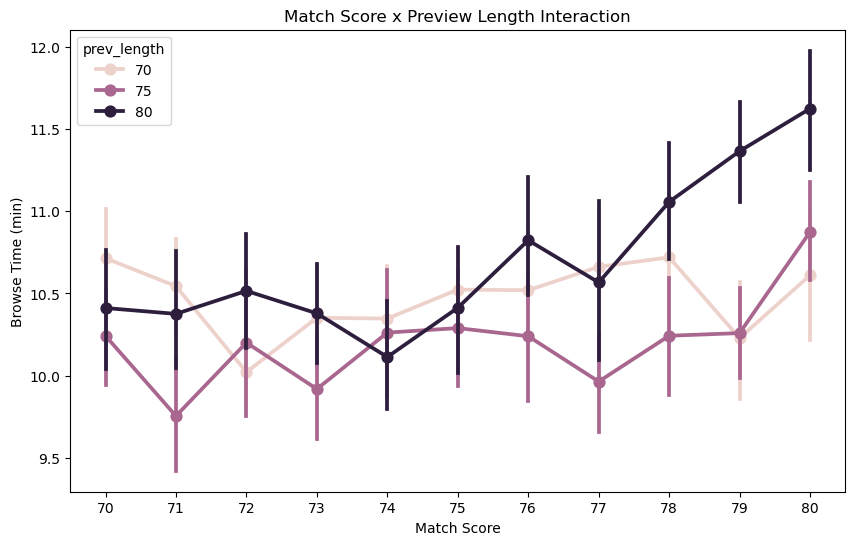

In [6]:
plt.figure(figsize=(10, 6))
fig1 = sns.pointplot(x="match_score", hue="prev_length", y="browse_time", data=data)
fig1.set_ylabel("Browse Time (min)")
fig1.set_xlabel("Match Score")
plt.title("Match Score x Preview Length Interaction")
plt.show()

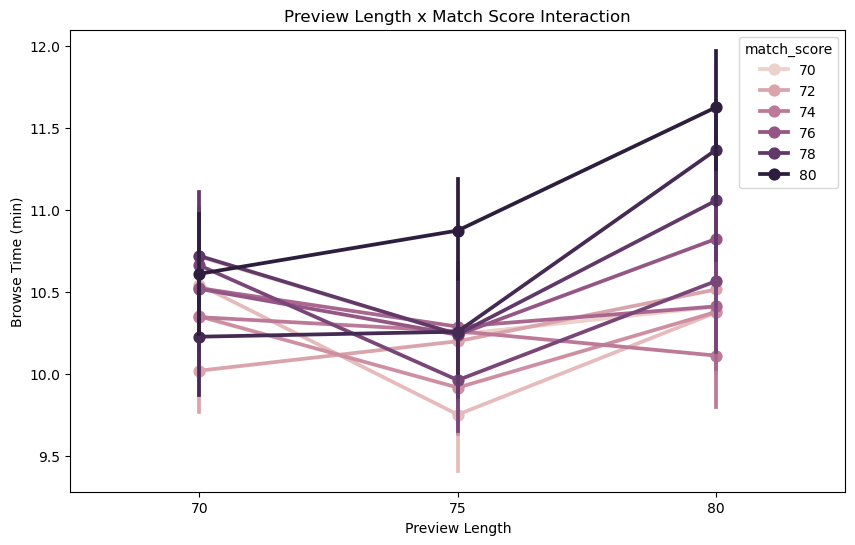

In [7]:
plt.figure(figsize=(10, 6))
fig1 = sns.pointplot(x="prev_length", hue="match_score", y="browse_time", data=data)
fig1.set_ylabel("Browse Time (min)")
fig1.set_xlabel("Preview Length")
plt.title("Preview Length x Match Score Interaction")
plt.show()

It is implied from these results that the higher the match score, the longer the preview length, and if the preview is the actual show, browse time increases.

In [8]:
data.head()

,prev_length,match_score,tile_size,prev_type,browse_time
0,75,79,0.2,TT,9.659422
1,75,79,0.2,TT,11.004677
2,75,79,0.2,TT,9.503274
3,75,79,0.2,TT,11.059120
4,75,79,0.2,TT,10.308966


## Models

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

model = smf.ols('browse_time ~ match_score * prev_length * C(prev_type)', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     19.51
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.70e-12
Time:                        12:59:47   Log-Likelihood:                -1414.7
No. Observations:                 990   AIC:                             2837.
Df Residuals:                     986   BIC:                             2857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  63.9671     14.050      4.553      0.000      36.396      91.538
match_score                -0.7353      0.187     -3.929      0.000      -1.103      -0.368
prev_length                -0.7717      0.187     -4.126      0.000      -1.139      -0.405
match_score:prev_length     0.0106      0.002      4.246      0.000       0.006       0.015
==============================================================================
Omnibus:                        2.184   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.974
Skew:                          -0.003   Prob(JB):                        0.373
Kurtosis:                       2.781   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Two-way interaction

In [10]:
model_twoway = smf.ols('browse_time ~ match_score + prev_length + C(prev_type)', data).fit()
sm.stats.anova_lm(model_twoway, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,987.0,1028.671188,0.0,NaN,NaN,NaN
1,986.0,1010.198133,1.0,18.473055,18.030554,0.000024


The two-way interaction of match score and preview length is significant.

### Main effects

In [11]:
model_match_score = ols('browse_time ~ prev_length + prev_type', data).fit()
sm.stats.anova_lm(model_match_score, model_twoway)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,988.0,1062.297073,0.0,NaN,NaN,NaN
1,987.0,1028.671188,1.0,33.625885,32.26371,1.770218e-08


In [12]:
model_prev_length = ols('browse_time ~ match_score', data).fit()
sm.stats.anova_lm(model_prev_length, model_twoway)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,988.0,1036.550199,0.0,NaN,NaN,NaN
1,987.0,1028.671188,1.0,7.879011,7.559834,0.006077


Both match score and preview length are significant.

## Optimal settings

In [13]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

In [14]:
# Add coded variables, quadratic, and interaction terms to the dataset
data['match_score_coded'] = convertNtoC(data['match_score'], UL=70, UH=80)
data['prev_length_coded'] = convertNtoC(data['prev_length'], UL=70, UH=80)
data['match_score_squared'] = data['match_score_coded'] ** 2
data['prev_length_squared'] = data['prev_length_coded'] ** 2
data['match_score_prev_length'] = data['match_score_coded'] * data['prev_length_coded']

In [15]:
response_model = ols('browse_time ~ match_score_coded + prev_length_coded + match_score_squared + prev_length_squared + match_score_prev_length', data=data).fit()
response_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            browse_time   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     21.82
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           9.14e-21
Time:                        12:59:47   Log-Likelihood:                -1391.3
No. Observations:                 990   AIC:                             2795.
Df Residuals:                     984   BIC:                             2824.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.0660      0.065    154.686      0.000       9.938      10.194
match_score_coded           0.2914      0.050      5.861      0.000       0.194       0.389
prev_length_coded           0.1093      0.039      2.837      0.005       0.034       0.185
match_score_squared         0.3453      0.089      3.879      0.000       0.171       0.520
prev_length_squared         0.3820      0.067      5.726      0.000       0.251       0.513
match_score_prev_length     0.2645      0.061      4.344      0.000       0.145       0.384
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.997
Skew:                           0.016   Prob(JB):                        0.369
Kurtosis:                       2.782   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model explains only 45% of the variability in browsing time. Because this dataset focuses on a narrow range of match_score (70-80) and prev_length (60-90), the variability is reduced.

In [16]:
intercept = response_model.params['Intercept']
beta1 = response_model.params['match_score_coded']
beta2 = response_model.params['prev_length_coded']
beta11 = response_model.params['match_score_squared']
beta22 = response_model.params['prev_length_squared']
beta12 = response_model.params['match_score_prev_length']

In [17]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5 * beta12], [0.5 * beta12, beta22]])

In [18]:
# Solve for the stationary point (coded values)
x_s = -0.5* np.matmul(np.linalg.inv(B), b)

# Convert coded values to natural units
optimal_match_score = convertCtoN(x_s[0, 0], UL=70, UH=80)
optimal_prev_length = convertCtoN(x_s[1, 0], UL=70, UH=80)

optimal_response = (
    intercept +
    beta1 * x_s[0, 0] + beta2 * x_s[1, 0] +
    beta11 * x_s[0, 0]**2 + beta22 * x_s[1, 0]**2 +
    beta12 * x_s[0, 0] * x_s[1, 0]
)

# Output the results
print(f"Optimal Match Score (Natural): {optimal_match_score:.2f}")
print(f"Optimal Preview Length (Natural): {optimal_prev_length:.2f}")
print(f"Predicted Minimum Browse Time: {optimal_response:.2f} minutes")

Optimal Match Score (Natural): 72.88
Optimal Preview Length (Natural): 75.02
Predicted Minimum Browse Time: 10.00 minutes


In [27]:
response_model.conf_int(alpha=0.05) 

,0,1
Intercept,9.938327,10.193726
match_score_coded,0.193826,0.388974
prev_length_coded,0.033680,0.184841
match_score_squared,0.170593,0.519964
prev_length_squared,0.251054,0.512873
match_score_prev_length,0.145022,0.384029


In [30]:
response_model.conf_int(0.05, cols=)

,0,1
Intercept,9.938327,10.193726
match_score_coded,0.193826,0.388974
prev_length_coded,0.033680,0.184841
match_score_squared,0.170593,0.519964
prev_length_squared,0.251054,0.512873
match_score_prev_length,0.145022,0.384029


In [29]:
predicted_values = response_model.fittedvalues

# Compute the 95% confidence intervals for the predicted response
# 'alpha=0.05' corresponds to a 95% CI
prediction_summary = response_model.get_prediction(data).summary_frame(alpha=0.05)
prediction_summary


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10.520125,0.070749,10.381288,10.658962,8.573468,12.466781
1,10.520125,0.070749,10.381288,10.658962,8.573468,12.466781
2,10.520125,0.070749,10.381288,10.658962,8.573468,12.466781
3,10.520125,0.070749,10.381288,10.658962,8.573468,12.466781
4,10.520125,0.070749,10.381288,10.658962,8.573468,12.466781
...,...,...,...,...,...,...
985,10.365167,0.062205,10.243097,10.487237,8.419634,12.310699
986,10.365167,0.062205,10.243097,10.487237,8.419634,12.310699
987,10.365167,0.062205,10.243097,10.487237,8.419634,12.310699
988,10.365167,0.062205,10.243097,10.487237,8.419634,12.310699


In [23]:
import numpy as np
from scipy import stats

# Sample data for coefficients (replace these with your actual values)
beta1, beta2, beta11, beta22, beta12 = 0.1, 0.2, 0.05, 0.05, 0.03
intercept = 2.5  # Intercept term
B = np.array([[1, 0.5], [0.5, 1]])  # Example matrix for solving stationary point
b = np.array([0.1, 0.2])  # Example b vector for solving stationary point

# Solve for the stationary point (coded values)
x_s = -0.5 * np.matmul(np.linalg.inv(B), b)

# Convert coded values to natural units
def convertCtoN(coded_value, UL, UH):
    return coded_value * (UH - UL) / 2 + (UL + UH) / 2

optimal_match_score = convertCtoN(x_s[0, 0], UL=70, UH=80)
optimal_prev_length = convertCtoN(x_s[1, 0], UL=70, UH=80)

# Predicted response at the optimal point
optimal_response = (
    intercept +
    beta1 * x_s[0, 0] + beta2 * x_s[1, 0] +
    beta11 * x_s[0, 0]**2 + beta22 * x_s[1, 0]**2 +
    beta12 * x_s[0, 0] * x_s[1, 0]
)

# Standard error of the response (this assumes you have the covariance matrix of the estimates)
# For simplicity, let's assume you have a standard error, or compute it based on your model:
# Example: Assume the variance-covariance matrix of the estimates is known as `cov_matrix`
cov_matrix = np.array([[0.01, 0.005], [0.005, 0.01]])  # Example covariance matrix

# Compute the standard error (SE) for the predicted response using the variance-covariance matrix
# Standard errors for the coefficients at the optimal point
se_x = np.sqrt(np.diag(np.matmul(np.matmul(np.linalg.inv(B), cov_matrix), np.linalg.inv(B).T)))

# Standard error of the predicted response
se_response = np.sqrt(
    se_x[0]**2 * (beta1**2 + 2 * beta11 * x_s[0, 0] + beta12 * x_s[1, 0]) +
    se_x[1]**2 * (beta2**2 + 2 * beta22 * x_s[1, 0] + beta12 * x_s[0, 0]) +
    2 * se_x[0] * se_x[1] * beta12
)

# Confidence interval (95% CI)
confidence_level = 0.95
alpha = 1 - confidence_level
t_stat = stats.t.ppf(1 - alpha / 2, df=len(b) - 1)  # t-statistic for 95% CI

ci_lower = optimal_response - t_stat * se_response
ci_upper = optimal_response + t_stat * se_response

# Output the results
print(f"Optimal Match Score (Natural): {optimal_match_score:.2f}")
print(f"Optimal Preview Length (Natural): {optimal_prev_length:.2f}")
print(f"Predicted Minimum Browse Time: {optimal_response:.2f} minutes")
print(f"95% Confidence Interval for Predicted Browse Time: ({ci_lower:.2f}, {ci_upper:.2f}) minutes")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

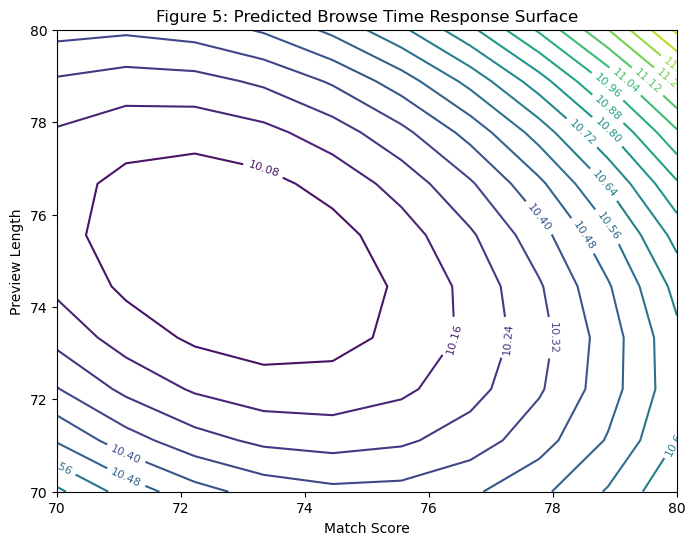

In [19]:
# Define the response surface function
def response_surface(params):
    match_score, prev_length = params
    match_score_coded = convertNtoC(match_score, UL=70, UH=80)
    prev_length_coded = convertNtoC(prev_length, UL=70, UH=80)
    return (
        intercept +
        response_model.params['match_score_coded'] * match_score_coded +
        response_model.params['prev_length_coded'] * prev_length_coded +
        response_model.params['match_score_squared'] * match_score_coded**2 +
        response_model.params['prev_length_squared'] * prev_length_coded**2 +
        response_model.params['match_score_prev_length'] * match_score_coded * prev_length_coded
    )

# Generate response surface data for visualization
match_score_range = np.linspace(70, 80, 10)
prev_length_range = np.linspace(70, 80, 10)
X, Y = np.meshgrid(match_score_range, prev_length_range)
Z = np.array([
    response_surface([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))
]).reshape(X.shape)

# Contour plot of the response surface
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('Match Score')
plt.ylabel('Preview Length')
plt.title('Figure 5: Predicted Browse Time Response Surface')
plt.show()

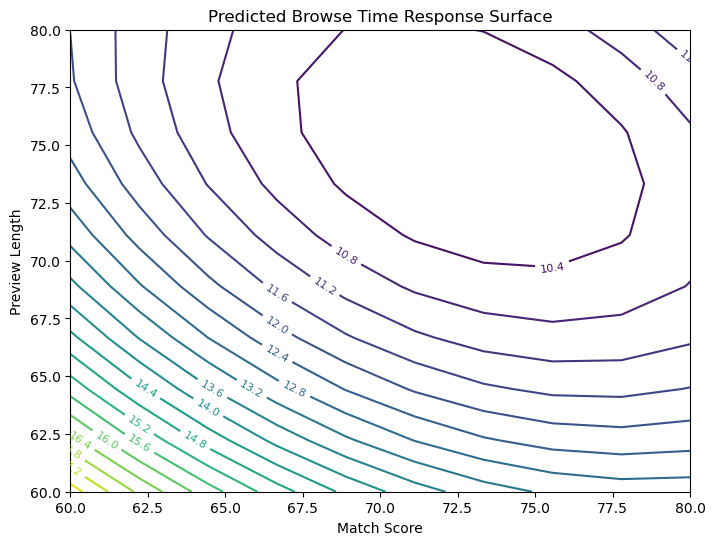

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def response_surface(params, intercept, response_model):
    match_score, prev_length = params
    match_score_coded = convertNtoC(match_score, UL=70, UH=80)
    prev_length_coded = convertNtoC(prev_length, UL=70, UH=80)
    
    return (
        intercept +
        response_model.params['match_score_coded'] * match_score_coded +
        response_model.params['prev_length_coded'] * prev_length_coded +
        response_model.params['match_score_squared'] * match_score_coded**2 +
        response_model.params['prev_length_squared'] * prev_length_coded**2 +
        response_model.params['match_score_prev_length'] * match_score_coded * prev_length_coded
    )

# Assuming intercept and response_model are defined elsewhere in your code
# Generate response surface data for visualization
match_score_range = np.linspace(60, 80, 10)
prev_length_range = np.linspace(60, 80, 10)
X, Y = np.meshgrid(match_score_range, prev_length_range)

# Calculate Z-values for each (match_score, prev_length) pair
Z = np.array([
    response_surface([x, y], intercept, response_model) for x, y in zip(np.ravel(X), np.ravel(Y))
]).reshape(X.shape)

# Contour plot of the response surface
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')  # Adjust levels as needed
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('Match Score')
plt.ylabel('Preview Length')
plt.title('Predicted Browse Time Response Surface')
plt.ylim(60,80)
plt.show()


In [31]:
import numpy as np
from scipy import stats

def calculate_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    
    # Calculate basic statistics
    n = len(data)
    mean = np.mean(data)
    std_error = stats.sem(data)  # Standard error of the mean
    
    # Get t-value for desired confidence level
    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
    
    # Calculate margin of error
    margin_error = t_value * std_error
    
    # Calculate confidence interval
    ci_lower = mean - margin_error
    ci_upper = mean + margin_error
    
    return mean, (ci_lower, ci_upper)


In [33]:
calculate_confidence_interval(data['browse_time'])

(10.45878024660368, (10.393903093532398, 10.523657399674963))

In [34]:
9.88 - 10.13

-0.25

In [35]:
9.95 - 10.06

-0.11000000000000121